In [2]:
!pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 1.6 MB/s eta 0:00:00


In [4]:
!pip install BVCscrap

In [5]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import scipy.optimize as sco
import random 

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import BVCscrap  as bvc
%matplotlib inline


### Determination of parameters
>After importing all necessary libraries, we must define the stocks, as well as the starting and ending date of the empirical testing. The list <em>tickers</em> contains the names of the stocks and the variables <em>startDate</em>, <em>endDate</em> contain the duration of the simulation. As you can see, the selected time horizon is 3 years, from 1-1-2018 until 31-12-2020 and the selected equities of this example are 6 stocks from the ??? sector of Casablanca stock exchange.

In [6]:
bvc.notation()

['Addoha',
 'AFMA',
 'Afric Indus',
 'Afriquia Gaz',
 'Agma',
 'Akdital',
 'Alliances',
 'Aluminium Maroc',
 'Aradei Capital',
 'ATLANTASANAD',
 'Attijariwafa',
 'Auto Hall',
 'Auto Nejma',
 'BALIMA',
 'BOA',
 'BCP',
 'BMCI',
 'Cartier Saada',
 'CDM',
 'CIH',
 'Ciments Maroc',
 'CMT',
 'Colorado',
 'COSUMAR',
 'CTM',
 'Dari Couspate',
 'Delta Holding',
 'Disty Technolog',
 'DISWAY',
 'Ennakl',
 'EQDOM',
 'FENIE BROSSETTE',
 'HPS',
 'IBMaroc',
 'Immr Invest',
 'INVOLYS',
 'Jet Contractors',
 'LABEL VIE',
 'LafargeHolcim',
 'Lesieur Cristal',
 'M2M Group',
 'Maghreb Oxygene',
 'Maghrebail',
 'Managem',
 'Maroc Leasing',
 'Maroc Telecom',
 'Microdata',
 'Mutandis',
 'Oulmes',
 'PROMOPHARM',
 'Rebab Company',
 'Res.Dar Saada',
 'Risma',
 'S2M',
 'Sanlam Maroc',
 'SALAFIN',
 'SMI',
 'Stokvis Nord Afr',
 'SNEP',
 'SODEP',
 'Sonasid',
 'SOTHEMA',
 'SRM',
 'Ste Boissons',
 'STROC Indus',
 'TAQA Morocco',
 'TGCC',
 'Timar',
 'Total Maroc',
 'Unimer',
 'Wafa Assur',
 'Zellidja',
 'MASI',
 'MSI20

In [10]:
tickers = ['Attijariwafa', 'BCP', 'BOA', 'Maroc Telecom', 'LafargeHolcim']
startDate = '2018-01-01'
endDate = '2023-04-11'

### Getting the data using BVCscrap
>In the following part, we make the connection with the <em>yahoo! finance API</em>. This connection is made with the <em>data.DataReader</em> function of the pandas library. It takes four arguments: (a) a list with the names of the securities, (b) the starting date, (c) the ending date and (d) the name of the API (in this case 'yahoo'). For example, in the following cell you can see the historical values of the first security 'BP'. The result contains the values 'High', 'Low', 'Open', 'Close', 'Volume' and 'Adj Close'.

In [11]:
data0=bvc.loadata(tickers[0],start=startDate,end=endDate)
data1=bvc.loadata(tickers[1],start=startDate,end=endDate)
data2=bvc.loadata(tickers[2],start=startDate,end=endDate)
data3=bvc.loadata(tickers[3],start=startDate,end=endDate)
data4=bvc.loadata(tickers[4],start=startDate,end=endDate)

JSONDecodeError: Expecting value: line 3 column 1 (char 2)

In [9]:
print(len(data0),'\n',len(data1),'\n',len(data2),'\n',len(data3),'\n',len(data4))

NameError: name 'data0' is not defined

In [45]:
def get_data(t,s,e):
    df=pd.DataFrame()
    for i in t:
        data=bvc.loadata(i,start=s,end=e)
        df[i]=data.loc[:]['Value'].values[:1245]
        df.index=data.loc[:]['Value'].index[:1245]
    return df

In [46]:
d=get_data(tickers,startDate,endDate)
d.index
d.index =  pd.to_datetime(d.index, format='%d/%m/%Y').date
d

,Attijariwafa,BCP,BOA,Maroc Telecom,LafargeHolcim
2018-04-09,492.00,292.00,229.5,148.55,NaN
2018-04-10,492.05,293.00,226.0,148.55,2015.0
2018-04-11,492.20,293.50,225.0,148.55,2000.0
2018-04-12,493.00,293.50,225.0,149.00,2005.0
2018-04-13,498.00,293.50,227.0,149.50,2000.0
...,...,...,...,...,...
2023-04-04,403.00,230.10,163.0,83.50,1386.0
2023-04-05,396.15,227.00,162.5,85.00,1400.0
2023-04-06,400.00,235.95,163.0,85.50,1390.0
2023-04-07,400.00,231.00,165.0,84.94,1390.0


### Data Pre-processing 
>From all the security values we only need the data of the 'Open' column in order to use it for the empirical testing. Therefore, we firstly draw all the desired data from the Yahoo API and then we discard the unnecessary columns, as follows:

## Security Values Visualisation
### Individual diagram for one security 
>Now, the dataframe <em>stockValues</em> contains the historical values of the securities. These values can be easily visualised with matplotlib library. The visualisation of security 'BP' is presented below:

In [47]:
#from pandas.plotting import register_matplotlib_converters
#egister_matplotlib_converters()
def plot_action(d,action):
    plt.figure(figsize=(16,9))
    plt.xlabel("Date", fontsize=16)
    plt.plot(d.index, d[action].values,label=action , color='red', lw=1)
    plt.title(f"Visualisation of {action} Values", fontsize=21)
    plt.xticks(fontsize=12, rotation=0)
    plt.legend()
    plt.show()

In [48]:
def plot_actions(actions):
    plt.figure(figsize=(16,9))
    plt.xlabel("Date", fontsize=16)
    for stock in actions:
        plt.plot(actions.index, actions[stock].values, label =stock, lw=1)
    plt.title("Visualisation of Stocks", fontsize=21)
    plt.xticks(fontsize=12, rotation=0)
    plt.legend()
    plt.show()

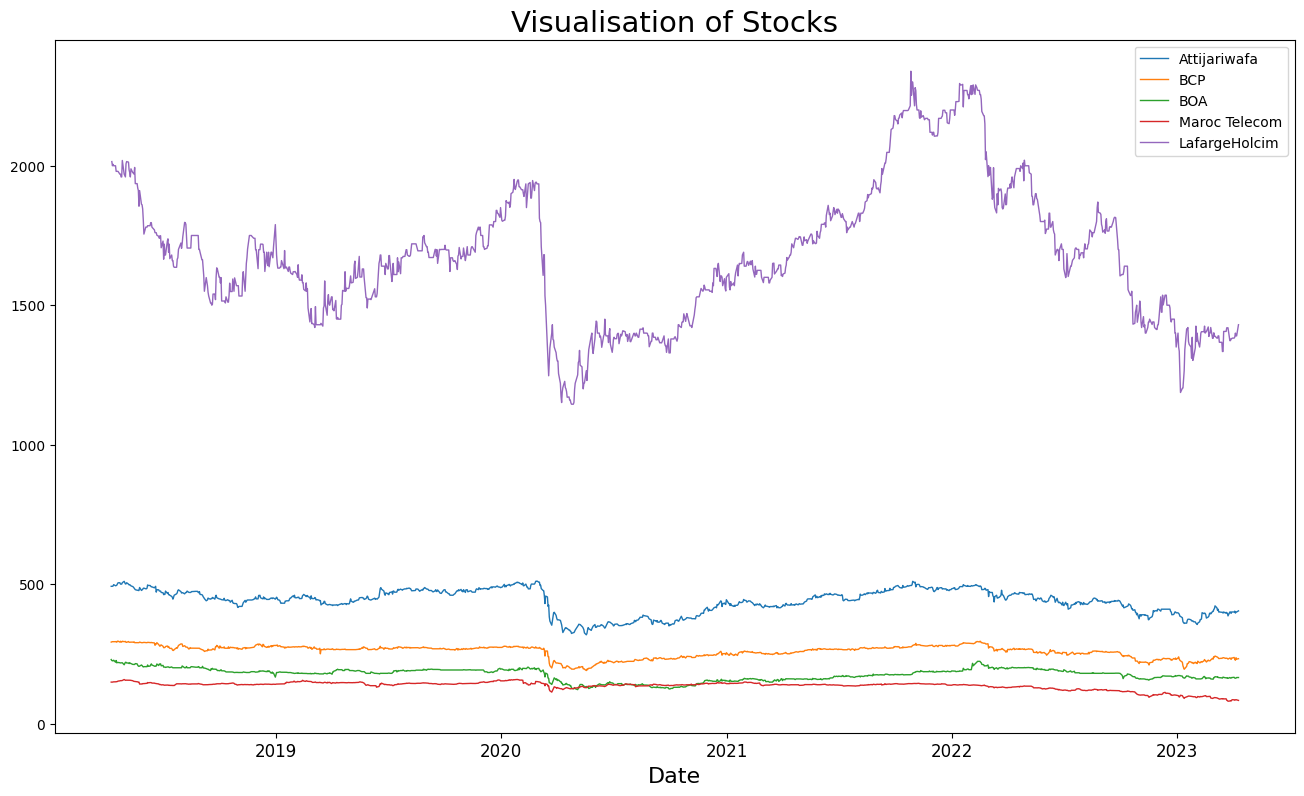

In [49]:
plot_actions(d)

In [50]:
d['BCP']
v='bcv'
print(f"Visualisation of {v} Values")

Visualisation of bcv Values


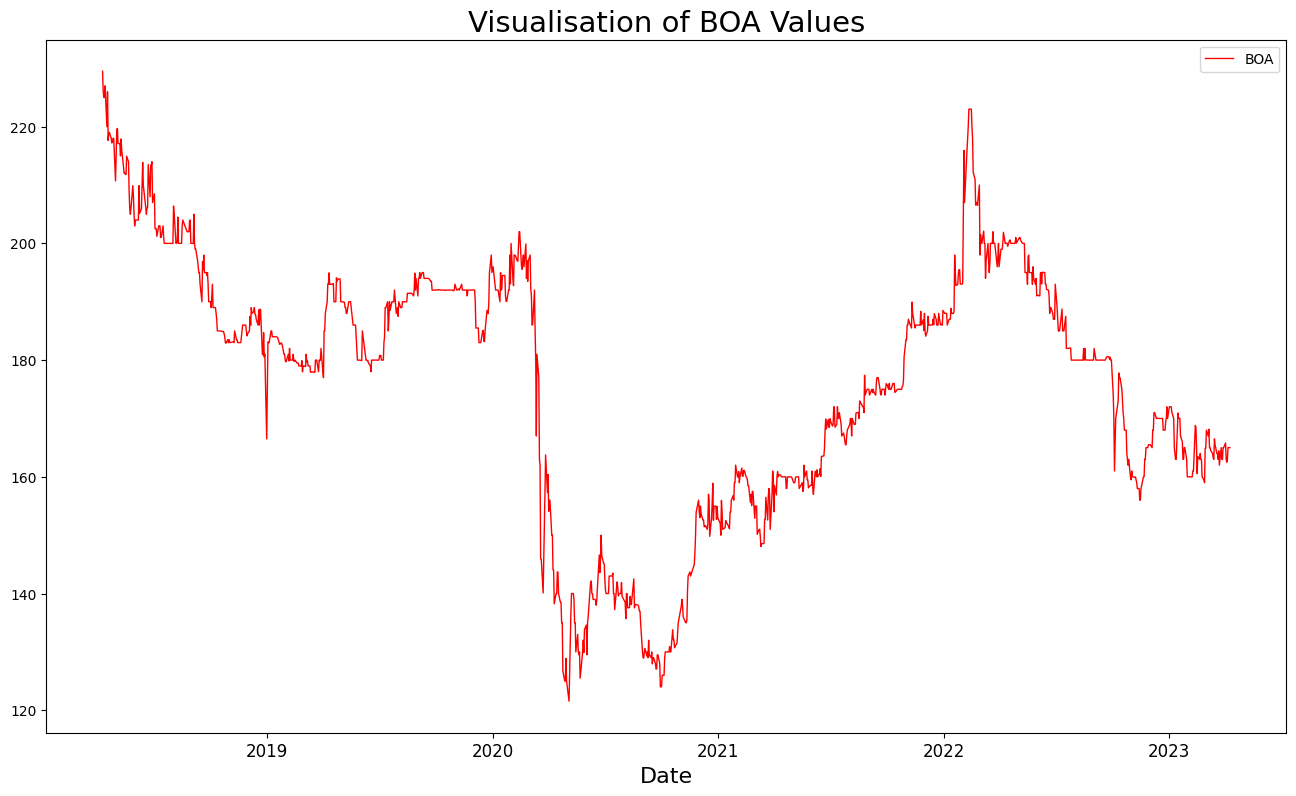

In [51]:
plot_action(d,'BOA')

### Security Returns
>The following step is the calculation of the arithmetical return of the securities. This step is executed by converting the pandas dataframe to numpy array in order to make the calculations and then converting the returns list back to dataframe. Given the historical values the calculation of the arithmetical return is presented below:

In [52]:
stockValuesArray = pd.DataFrame(d).to_numpy()

In [0]:
stockValuesArray = pd.DataFrame(d).to_numpy()
# stockReturnsArray = np.empty(shape = (numOfDates-1, numOfSecurities))
for i in range(numOfSecurities):
    for j in range(numOfDates-1):
        stockReturnsArray[j][i] = (stockValuesArray[j+1][i]-stockValuesArray[j][i])/stockValuesArray[j][i]
returnDates = d.index[1:]
stockReturns = pd.DataFrame(stockReturnsArray, index=returnDates, columns=stockValues.columns) 
print("============  Stock Returns  ============ \n")
display(stockReturns)

### Returns Visualisation
>The visualisation of the return of each security is presented in the following figure:

In [0]:
fig, ax = plt.subplots(2, 3, figsize=(16,9))
for j in range(numOfSecurities):
    colors = np.array([(1,0,0)]*len(returnDates))
    for i in range(numOfDates-1):
        if stockReturnsArray[i][j] > 0:
            colors[i] = (0,1,0)
    ax[j//3,j%3].bar(returnDates, stockReturnsArray[:,j], color=colors)
    ax[j//3,j%3].set_title(stockValues.columns[j], fontsize=18)
    ax[j//3,j%3].set_xticklabels([])
    ax[j//3,j%3].set_xlabel("Date")
    ax[j//3,j%3].set_ylabel("Return")
    fig.suptitle('Visualisation of Security Returns', fontweight='bold', fontsize=28)
plt.savefig("barplot7.png", dpi=300)

### Financial Statistics
>In the next step, some fundamental statistical indices of the data are calculated. This proccess is made with the numpy library which supports a variety of statistical calculations, as shown in the following section:

In [0]:
from scipy.stats import kurtosis, skew

MinReturn = [0 for i in range(numOfSecurities)]
MaxReturn = [0 for i in range(numOfSecurities)]
MedianReturn = [0 for i in range(numOfSecurities)]
MeanReturn = [0 for i in range(numOfSecurities)]
SD = [0 for i in range(numOfSecurities)]
VaR99 = [0 for i in range(numOfSecurities)]
VaR97 = [0 for i in range(numOfSecurities)]
VaR95 = [0 for i in range(numOfSecurities)]
Skewness = [0 for i in range(numOfSecurities)]
Kurtosis = [0 for i in range(numOfSecurities)]
AbsMinPerSD = [0 for i in range(numOfSecurities)]

for i in range(numOfSecurities):
	MinReturn[i] = np.min(stockReturnsArray[:,i])
	MaxReturn[i] = np.max(stockReturnsArray[:,i])
	MedianReturn[i] = np.median(stockReturnsArray[:,i])
	MeanReturn[i] = np.mean(stockReturnsArray[:,i])
	SD[i] = np.std(stockReturnsArray[:,i])
	VaR99[i] = np.percentile(stockReturnsArray[:,i], 1)
	VaR97[i] = np.percentile(stockReturnsArray[:,i], 3)
	VaR95[i] = np.percentile(stockReturnsArray[:,i], 5)
	Skewness[i] = skew(stockReturnsArray[:,i], bias=False)
	Kurtosis[i] = kurtosis(stockReturnsArray[:,i], bias=False)
	AbsMinPerSD[i] = np.abs(MinReturn[i])/SD[i]

statistics = pd.DataFrame(
    {'MinReturn': MinReturn,
     'MaxReturn': MaxReturn,
     'Median': MedianReturn,
     'Mean': MeanReturn,
     'SD': SD,
     'VaR99': VaR99,
     'VaR97': VaR97,
     'VaR95': VaR95,
     'Skewness': Skewness,
     'Kurtosis': Kurtosis,
     'AbsMinPerSD': AbsMinPerSD,     
    }, index=stockValues.columns)    
    
    
display(statistics)

### Covariance - Correlation
>Now, given the arithmetical returns of the securities we can compute the variance=covariance matrix among all securities. The computation can be achieved with the pandas function cov() which calculates the covariance matrix of a dataframe.

In [0]:
cov = stockReturns.cov()
covarianceMatrix = np.array(cov)
print("============  Covariance Matrix  ============")
display(cov)

>The correlation matrix can be computed accordingly, with the corr() function:

In [0]:
correlation = stockReturns.corr()
print("============  Correlation Matrix  ============")
correlation.style.background_gradient(cmap='Wistia').set_precision(3)


## Portfolio Optimisation
>In this section we attempt to optimise the portfolio of securities, using the mean - variance method. The  optimisation problem is a quadratic bi-objective problem, which will be solved parametrically setting th expected return as a parameter. We use the scipy optimiser library in order to solve the problem:  

### Global Minimum Variance Portfolio
>Initially, we compute the global minimum variance portfolio (GMVP) using the scipy minimise function. The minimise function takes as an argument the mean return column-vector and the covariance 2D matrix and computes the proportions of the GMVP minimising the quantity defined in the function named 'Portfolio Volatility' which is the standard deviation of the portfolio. Additionally, we set the constraint that the weights sum to 1 and that the bounds of the proportions are (0,1), imposing the short sales restriction.

In [0]:
#Objective Function
def portfolioVolatility(weights, MeanReturn, covarianceMatrix):
    std = np.sqrt(np.dot(weights.T, np.dot(covarianceMatrix, weights))) 
    return std

#Constraints
args = (MeanReturn, covarianceMatrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0,1)
bounds = tuple(bound for asset in range(numOfSecurities))

#Optimisation Function
minVolatilityPortfolio = sco.minimize(portfolioVolatility, numOfSecurities*[1./numOfSecurities,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

sdPort1 = np.sqrt(np.dot(minVolatilityPortfolio['x'].T, np.dot(covarianceMatrix, minVolatilityPortfolio['x']))) 
retPort1 = np.sum(MeanReturn*minVolatilityPortfolio['x'] ) 


print("Risk of minimum volatility portfolio:", sdPort1)
print("Return of minimum volatility portfolio:", retPort1)
print("Sharpe Ratio of minimum volatility portfolio:", retPort1/sdPort1)
print(minVolatilityPortfolio['x'])

plt.figure(figsize=(16,9))
plt.bar(tickers, minVolatilityPortfolio['x'], color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r"Securities", fontsize=22)
plt.ylabel(r"Portfolio Percentage", fontsize=22)
plt.title(r"Minimum Volatility Portfolio", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
plt.savefig("barplot8.png", dpi=300)

### Max Sharpe Ratio Portfolio
>With the same function we can compute the portfolio that maximises the sharpe ratio. The only difference between this and the previou step is the different minimisation function, which now is altered in order to maximise sharpe ratio. Because of the definition of the scipy minimise function we should form a minimisation problem. Therefore, we define the quantity of negative sharpe ratio, which should be minimised in order to maximise positive sharpe ratio.

In [0]:
#Objective Function
def negSharpeRatio(weights, MeanReturn, covarianceMatrix):
    returns = np.sum(MeanReturn*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(covarianceMatrix, weights)))
    return (- returns / std)

#Constraints
args = (MeanReturn, covarianceMatrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0,1)
bounds = tuple(bound for asset in range(numOfSecurities))

#Optimisation Function
maxSharpeRatioPortfolio = sco.minimize(negSharpeRatio, numOfSecurities*[1./numOfSecurities,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

sdPort2 = np.sqrt(np.dot(maxSharpeRatioPortfolio['x'].T, np.dot(covarianceMatrix, maxSharpeRatioPortfolio['x']))) 
retPort2 = np.sum(MeanReturn*maxSharpeRatioPortfolio['x'] ) 

print("Risk of maximum sharpe ratio portfolio:", sdPort2)
print("Return of maximum sharpe ratio portfolio:", retPort2)
print("Maximum Sharpe Ratio:", retPort2/sdPort2)

plt.figure(figsize=(16,9))
plt.bar(tickers,maxSharpeRatioPortfolio['x'], color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r"Securities", fontsize=22)
plt.ylabel(r"Portfolio Percentage", fontsize=22)
plt.title(r"Maximum Sharpe Ratio Portfolio", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
plt.savefig("barplot10.png", dpi=300)

### Efficient Frontier 
>In this step, we parametrically solve the same problem in order to gradually find the efficient frontier. Therefore, we compute a number of efficient portfolios between the GMVP and the maximum return portfolio.

In [0]:
numOfPortfolios = 30
maxReturn = max(MeanReturn)
returnRange = np.linspace(retPort1, maxReturn, numOfPortfolios)
efficientFrontier = []
AllReturns = []
AllSDs = []
for target in returnRange:
    args = (MeanReturn, covarianceMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(MeanReturn*x) - target},
	                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(numOfSecurities))
    result = sco.minimize(portfolioVolatility, numOfSecurities*[1./numOfSecurities,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    efficientFrontier.append(result)
    AllSDs.append(np.sqrt(np.dot(result['x'].T, np.dot(covarianceMatrix, result['x']))))
    AllReturns.append(np.sum(MeanReturn*result['x']))    

>The formulated portfolios are presented below:

In [0]:
efficientPortfolios = [0 for i in range(numOfPortfolios)]
for i in range(numOfPortfolios):
    efficientPortfolios[i] = np.round(efficientFrontier[i].x,2)

df = pd.DataFrame(efficientPortfolios, columns=tickers)
df.index = df.index + 1
display(df)

weightingFactor = [[0 for i in range(numOfPortfolios)] for j in range(numOfSecurities)]
for i in range(numOfSecurities):
    for j in range(numOfPortfolios):
        weightingFactor[i][j] = efficientFrontier[j].x[i]
        
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
for z in range(numOfSecurities):
    xs = np.arange(1, numOfPortfolios+1)
    ys = weightingFactor[z]
    cs =(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    ax.bar(xs, ys, z, zdir='y', color=cs, alpha=0.7, width=0.4)
plt.yticks(np.arange(numOfSecurities), tickers, rotation='vertical')
plt.xticks(np.arange(numOfPortfolios))
ax.set_xlabel(r'Portfolios', fontsize=22)
ax.set_ylabel(r'Securities', fontsize=22)
ax.set_zlabel(r'Proportion', fontsize=22)
plt.title(r"Set of Efficient Portfolios", fontsize=28)
plt.savefig("barplot11.png", dpi=150)

### Security average proportion and participation
>Finally, we can determine the percrentage of participation of each security in the efficient portfolios in order to obtain another perspective of the solution. In the following section, we present the according idea:

In [0]:
securityParticipation = [0 for i in range(numOfSecurities)]
for i in range(numOfSecurities):
    for j in range(numOfPortfolios):
        if weightingFactor[i][j] >= 0.05:
            securityParticipation[i] = securityParticipation[i] + 1
    securityParticipation[i] = securityParticipation[i] / numOfPortfolios
            
securityAvgProportion = [0 for i in range(numOfSecurities)]
for i in range(numOfSecurities):
    securityAvgProportion[i] = np.mean(weightingFactor[i])

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0, 1, numOfSecurities))
for i,c in zip(range(numOfSecurities),colors):
    if(securityParticipation[i] != 0):
        plt.scatter(securityParticipation[i], securityAvgProportion[i], c='b', marker='x' ,label=tickers[i], s=100)

for i, txt in enumerate(tickers):
    if(securityParticipation[i] != 0):
        ax.annotate(txt, (securityParticipation[i], securityAvgProportion[i]))
plt.xlabel(r"Average Participation", fontsize=22)
plt.ylabel(r"Average Proportion", fontsize=22)
plt.title(r"Security Evaluation", fontsize=28)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True, shadow=True)
plt.savefig("barplot10.png", dpi=300)

>The securities which are placed in the upper right section of the figure are the most dominant investment opportunities.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c7fad4d-c735-4d40-9054-eda0347a7ae2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>